<a href="https://colab.research.google.com/github/brunoodon/mvp_sprintII/blob/main/MVP_Sprint_II.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **MVP - Machine Learn - Sprint II**

Carregando  e imprimindo o dataset "Adult", obtido no UCI Repository. Ele representa o "Adult Census" estadunidense.

In [112]:
import pandas as pd
import warnings
warnings.filterwarnings("ignore")
import numpy as np
import csv
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
url_adult = 'https://raw.githubusercontent.com/brunoodon/mvp_sprintII/main/adult_usa.data'
column_names = ['Age', 'Workclass', 'FNWGT', 'Education', 'Education-Num', 'Marital-Status', 'Occupation', 'Relashionship', 'Race', 'Sex', 'Capital-Gain', 'Capital-Loss', 'Hours-Per_Week', 'Native-Country']
dataset = pd.read_csv(url_adult, names=column_names).sort_values(by='Capital-Gain', ascending=False)
dataset.head(1500)

,Age,Workclass,FNWGT,Education,Education-Num,Marital-Status,Occupation,Relashionship,Race,Sex,Capital-Gain,Capital-Loss,Hours-Per_Week,Native-Country
17644,61,?,139391,Some-college,10,Married-civ-spouse,?,Husband,White,Male,99999,0,30,United-States
30913,38,Private,185848,Masters,14,Married-civ-spouse,Exec-managerial,Husband,White,Male,99999,0,70,United-States
20055,50,Private,183173,HS-grad,9,Married-civ-spouse,Prof-specialty,Husband,White,Male,99999,0,40,United-States
6035,78,Self-emp-not-inc,316261,Bachelors,13,Never-married,Exec-managerial,Not-in-family,White,Male,99999,0,20,United-States
1826,22,Self-emp-not-inc,202920,HS-grad,9,Never-married,Prof-specialty,Unmarried,White,Female,99999,0,40,Dominican-Republic
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22580,55,Private,162205,HS-grad,9,Married-civ-spouse,Transport-moving,Husband,White,Male,5178,0,72,United-States
16961,28,Private,176683,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,5178,0,50,United-States
24454,38,Private,207568,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,5178,0,40,United-States
28469,54,Private,135388,HS-grad,9,Married-civ-spouse,Craft-repair,Husband,White,Male,5178,0,40,United-States


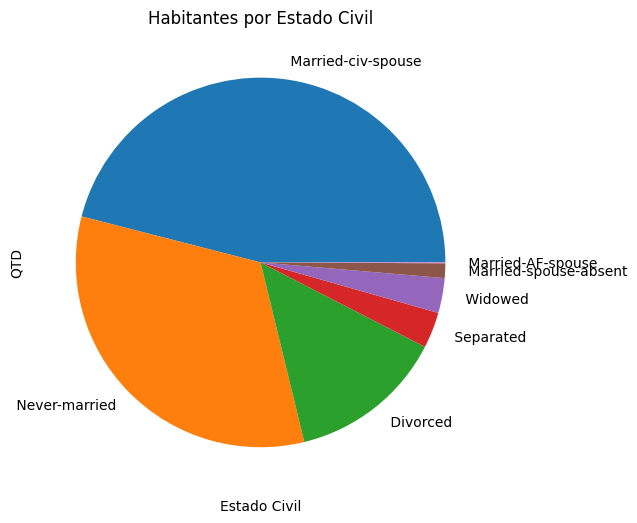

In [58]:
#imprimindo qauntidade total de linhas e colunas do dataset:
dataset.shape
#exibindo um gáfico de habitantes por estado civil:
df = dataset["Marital-Status"].value_counts()
plt.figure(figsize=(10,6))
df.plot(kind='pie')
plt.title("Habitantes por Estado Civil")
plt.xlabel("Estado Civil")
plt.ylabel("QTD")
plt.show()

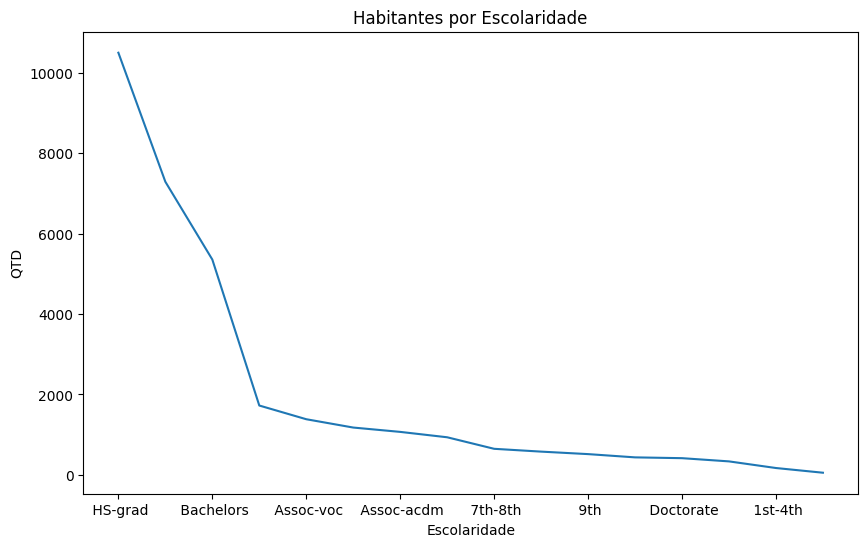

In [82]:
#exibindo um gráfico de habitantes por Escolaridade:
df = dataset["Education"].value_counts()
plt.figure(figsize=(10,6))
df.plot(kind='line')
plt.title("Habitantes por Escolaridade")
plt.xlabel("Escolaridade")
plt.ylabel("QTD")
plt.show()

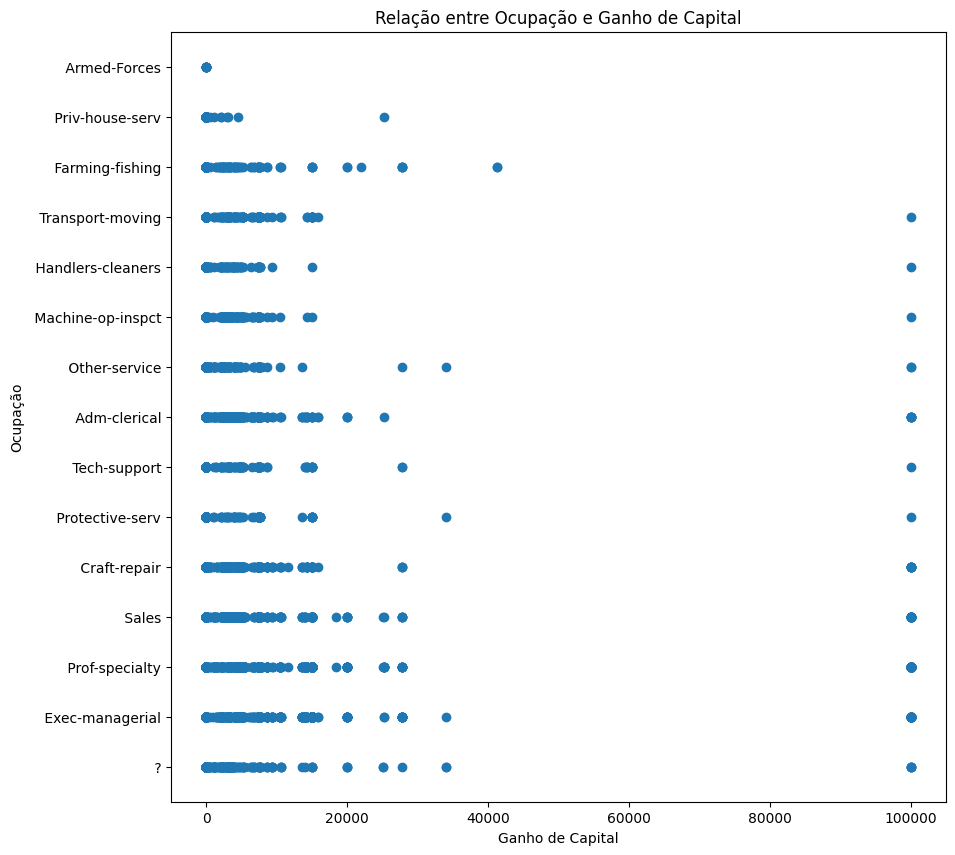

In [203]:
#exibindo um  gráfico da relçaõ entre ganho de capital e tipo de ocupação:
df = dataset[["Capital-Gain", "Occupation"]]
plt.figure(figsize=(10,10))
y = df['Occupation']
x = df['Capital-Gain']
plt.scatter(x, y)
#df.plot(kind='scatter', subplots=True)
plt.title("Relação entre Ocupação e Ganho de Capital")
plt.xlabel("Ganho de Capital")
plt.ylabel("Ocupação")
plt.show()

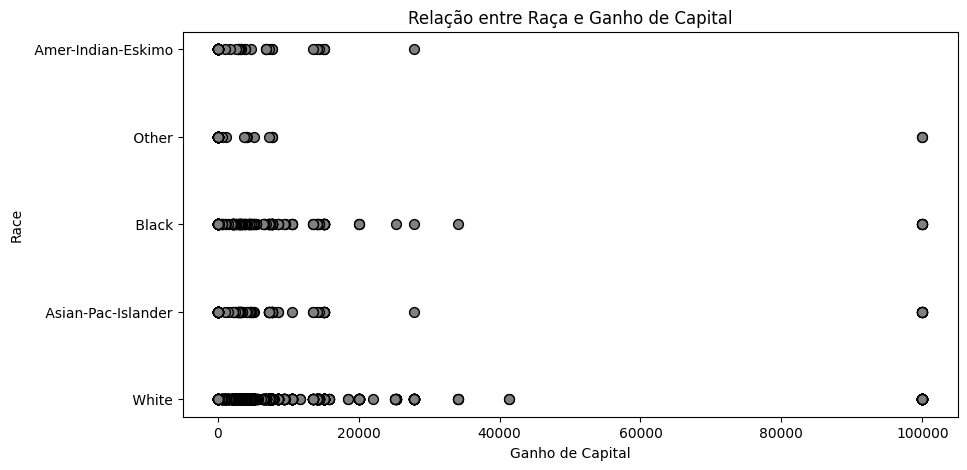

In [205]:
#exibindo um  gráfico da relçaõ entre ganho de capital e Raça:
df = dataset[["Capital-Gain", "Race"]]
plt.figure(figsize=(10,5))
y = df['Race']
x = df['Capital-Gain']
plt.scatter(x, y, s=50, edgecolors='black', c='grey')
#df.plot(kind='scatter', subplots=True)
plt.title("Relação entre Raça e Ganho de Capital")
plt.xlabel("Ganho de Capital")
plt.ylabel("Race")
plt.show()

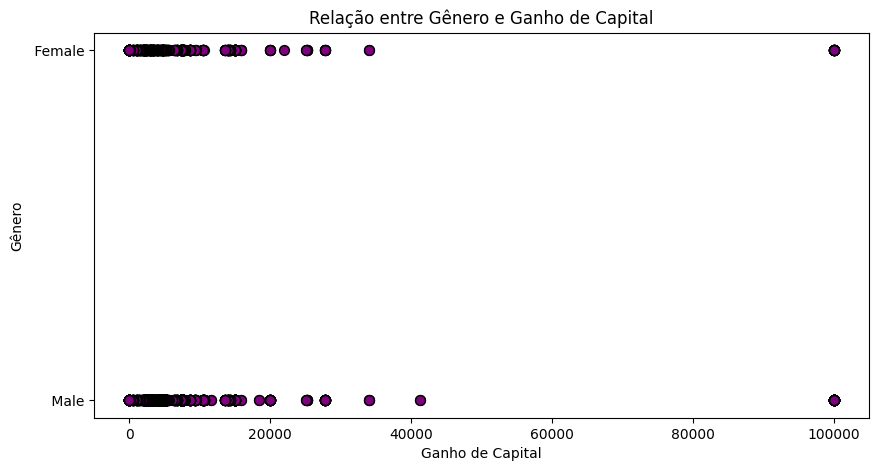

In [206]:
#exibindo um  gráfico da relção entre ganho de capital e Gênero:
df = dataset[["Capital-Gain", "Sex"]]
plt.figure(figsize=(10,5))
y = df['Sex']
x = df['Capital-Gain']
plt.scatter(x, y, s=50, c='purple', edgecolor='black')
#df.plot(kind='scatter', subplots=True)
plt.title("Relação entre Gênero e Ganho de Capital")
plt.xlabel("Ganho de Capital")
plt.ylabel("Gênero")
plt.show()

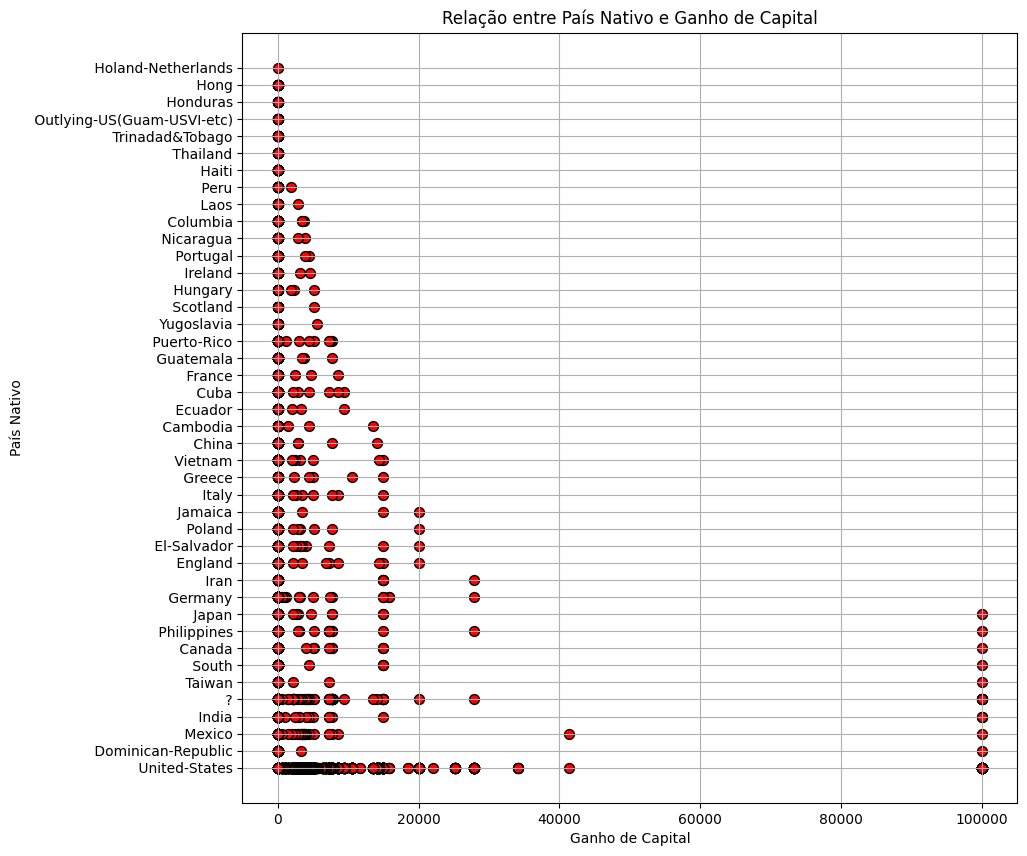

In [208]:
#exibindo um  gráfico da relção entre ganho de capital e País Nativo:
df = dataset[["Capital-Gain", "Native-Country"]]
plt.figure(figsize=(10,10))
y = df['Native-Country']
x = df['Capital-Gain']
plt.scatter(x, y, s=50, c='red', edgecolor='black')
#df.plot(kind='scatter', subplots=True)
plt.title("Relação entre País Nativo e Ganho de Capital")
plt.xlabel("Ganho de Capital")
plt.ylabel("País Nativo")
plt.grid(True)
plt.show()

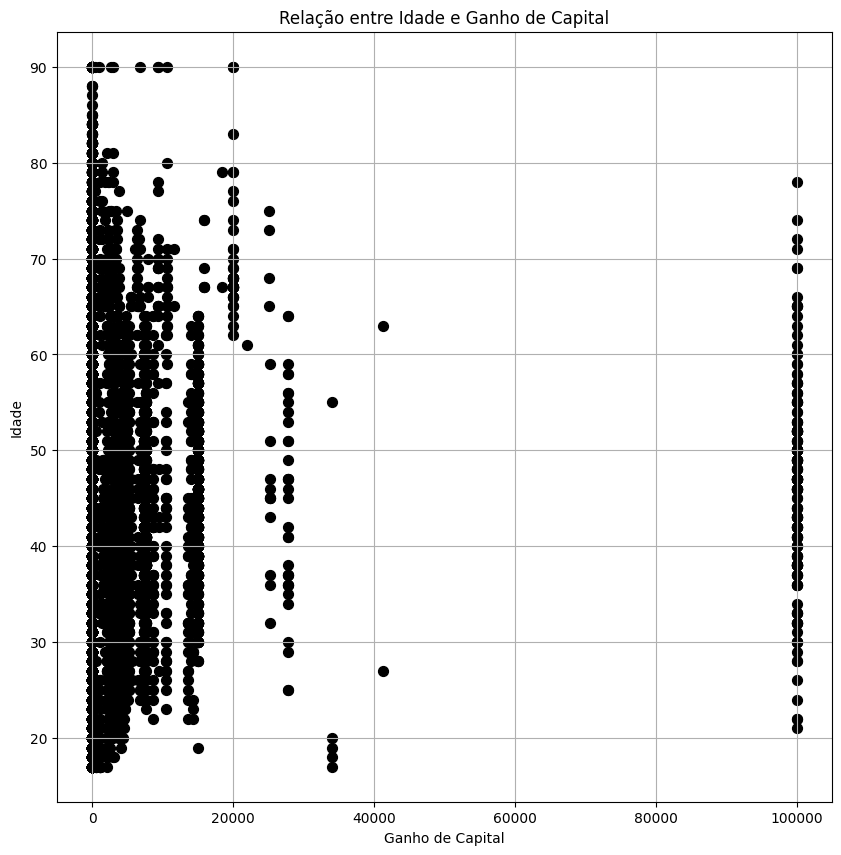

In [212]:
#exibindo um  gráfico da relção entre ganho de capital e Idade:
df = dataset[["Capital-Gain", "Age"]]
plt.figure(figsize=(10,10))
y = df['Age']
x = df['Capital-Gain']
plt.scatter(x, y, s=50, c='black')
#df.plot(kind='scatter', subplots=True)
plt.title("Relação entre Idade e Ganho de Capital")
plt.xlabel("Ganho de Capital")
plt.ylabel("Idade")
plt.grid(True)
plt.show()

In [75]:
array = dataset.values
X = array[:,[0,2,4,10,11,12]]
#padronizando os dados numéricos:
##avg = np.mean(X)
##std = np.std(X)
##X_std = (X - std) / std
#normalizando os dados, pois muitos deram números negativos:
max = np.max(X)
min = np.min(X)
X_norm = (X - min) / (max - min)
y = array[:,1]
X_norm_train, X_norm_test, y_train, y_test, = train_test_split(X_norm, y, test_size=0.20, random_state=7)
display(X_norm)

array([[4.108560286386858e-05, 0.09388464375077878,
        6.735344731781735e-06, 0.06735277378334417, 0.0,
        2.0206034195345204e-05],
       [2.559430998077059e-05, 0.12517503477121716,
        9.429482624494428e-06, 0.06735277378334417, 0.0,
        4.714741312247214e-05],
       [3.367672365890867e-05, 0.12337333005546557,
        6.061810258603561e-06, 0.06735277378334417, 0.0,
        2.694137892712694e-05],
       ...,
       [2.8288447873483286e-05, 0.14241886435352477,
        9.429482624494428e-06, 0.0, 0.0, 3.0309051293017804e-05],
       [4.31062062834031e-05, 0.26343347668392036, 2.694137892712694e-06,
        0.0, 0.0, 2.694137892712694e-05],
       [1.8185430775810682e-05, 0.12661168380250623,
        6.061810258603561e-06, 0.0, 0.0, 2.694137892712694e-05]],
      dtype=object)

Aplicando problemas de Classificação com outros datasets

KNN: 0.657440 (0.013248)
CART: 0.525453 (0.011377)
NB: 0.291779 (0.057464)
SVM: 0.696369 (0.011930)


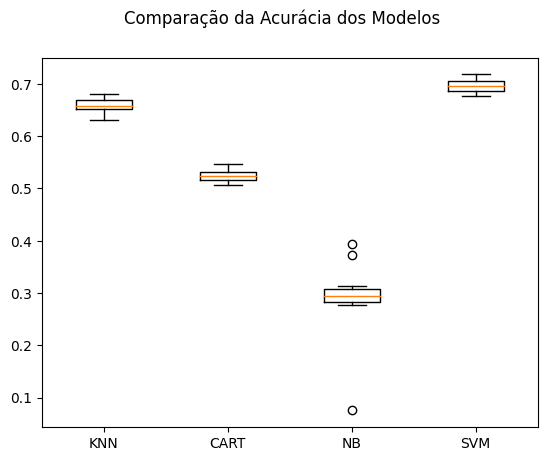

In [210]:
num_particoes = 20
kfold = KFold(n_splits=num_particoes, shuffle=True, random_state=7)
np.random.seed(7)
models = []
results = []
names = []
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC()))
for name, model in models:
  cv_results = cross_val_score(model, X_norm_train, y_train, cv=kfold, scoring='accuracy')
  results.append(cv_results)
  names.append(name)
  msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std()) # média e desvio padrão dos 20 resultados da validação cruzada
  print(msg)

# Boxplot de comparação dos modelos
fig = plt.figure()
fig.suptitle('Comparação da Acurácia dos Modelos')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

